<img src="https://upload.wikimedia.org/wikipedia/commons/d/de/Logotipo_Ikiam.png" width=300 height=240 />

<center> 
    
## EXAMEN DE RECUPERACION
    
## GBI6-2021II: BIOINFORMÁTICA

**Apellidos y Nombres:** Carranco Avila, Diego Israel 

**Fecha:** 17-08-2022

**Sexto Semestre**

**Carrera de biotecnología**

**Vaya a alguno de los siguientes enlaces:**

▪ https://www.genenames.org/data/genegroup/#!/group/1054,

▪ http://ribosome.med.miyazaki-u.ac.jp/rpg.cgi?mode=orglist&org=Homo%20sapiens&type=m,

▪ https://www.arb-silva.de/browser/ssu-138.1/AADB02002318

**En ellas se tiene información sobre las proteínas o RNA ribosomales:**

• S Ribosomal proteins:

• L Ribosomal proteins:

• S Ribosomal proteins – Mitochondrial:

• L Ribosomal proteins – Mitochondrial:

• RNA ribosomal: DIEGO CARRANCO

# Introducción

**Ribosomas**

Los ribosomas son responsables de la síntesis de proteínas, en un proceso conocido como traducción. La información necesaria para esa síntesis se encuentra en el ARN mensajero (ARN), cuya secuencia de nucleótidos, determina la secuencia de aminoácidos de la proteína

Los ribosomas de todos los organismos vivos constan de dos subunidades : una subunidad pequeña , que decodifica la información de las moléculas de ARN mensajero (ARNm), y una subunidad grande , que cataliza la formación de un enlace peptídico entre la cadena polipeptídica en crecimiento de la futura proteína y cada uno de ellos. (Dinkova, Sánchez, 2009)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Ribosome_shape.png/800px-Ribosome_shape.png" width=300 height=240 />

**RNA Ribosomal**

El ácido ribonucleico ribosómico (rRNA) es un tipo de ARN no codificante que es el componente principal de los ribosomas , requerido por todas las células. El ARNr es una ribozima que lleva a cabo la síntesis de proteínas en los ribosomas. El ARN ribosómico se transcribe a partir del ADN ribosómico (ADNr) y luego se asocia con proteínas ribosómicas para formar subunidades de ribosomas pequeñas y grandes . El ARNr es el factor físico y mecánico del ribosoma que provoca la transferencia de ARN (ARNt) y ARN mensajero(ARNm) para el procesamiento y traducción de este último en proteínas. (Gelambi, 2022)

El rRNA 5S es una molécula de rRNA de aproximadamente 120 nucleótidos de longitud y una masa de 40 kDa, que interviene en la iniciación de la síntesis de polipéptidos. Y la nomenclatura 5S se refiere a la velocidad de sedimentación de la molécula en un ultra-centrífugador. Es el lugar donde se sintetiza la mayor parte del ARN ribosómico y donde se ensamblan las subunidades ribosómicas.
<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/RF00001.jpg" width=300 height=240 />

**Seleccione alguna de ellas y realice lo siguiente:** 


<table>
  <tr>
    <th></th>
    <th>Programación</th>
    <th>Defensa  oral</th>
  </tr>
  <tr>
    <td>1. [1 punto] Crear un repositorio de nombre
“2022I_Recuperacion”. Generar un Readme con los detalles
de las actividades, del equipo utilizado y de los programas
utilizados. Mantenga un control de cambios</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>2. [1 punto] Con el grupo de componentes ribosomales
seleccionado, realizar una búsqueda con Python de la
información para cada componente (formato gdb) y separar
en secuencias para células humanas sanas y canceros</th>
    <th></th>
    <th></th>
  </tr>
  <tr>
    <td>3. [1 punto] Realizar un histograma (matplotlib) para cada
componente con el número de nucleótidos de las secuencias.
Explique los hallazgos.</th>
    <th></th>
    <th></th>
  </tr>
  <tr>
    <td>4. [2 puntos] Realizar un árbol filogenético donde se muestre
las secuencias de células normales y las células cancerosas.
Explique los hallazgos</th>
    <th></th>
    <th></th>
  </tr>
</table>

**1. [1 punto]** Crear un repositorio de nombre
“2022I_Recuperacion”. Generar un Readme con los detalles
de las actividades, del equipo utilizado y de los programas
utilizados. Mantenga un control de cambios.

**Respuesta pregunta 1**

**Link del repositorio:**
https://github.com/DiegoICA/2022I_Recuperacion.git

**2. [1 punto]** Con el grupo de componentes ribosomales
seleccionado, realizar una búsqueda con Python de la
información para cada componente (formato gdb) y separar
en secuencias para células humanas sanas y cancerosas.

In [14]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline

## Primero se realiza una busqueda de rRNA 5s dentro de la secuencias del genbank y se descargar en formato .gb y con filtro de 
## longitudes de tamaño para no requirir un gasto computacional importante.  
## (rRNA 5S homo sapiens) AND "primates"[porgn:__txid9443] 

records = []
id_sanas = []
id_enfermas = [] 
y_sequences = []
n_sequences = []
comments = []
not_comments = []
len_enfermas = []
len_sanas = []
#annotations 

## Aquellos que posean información se los considerara como secuencias de celulas enfermas. 
for seq_record in SeqIO.parse("sequence.gb", "genbank"): 
    #seq = seq_record.seq
    #print (seq_record.description)
    record = seq_record.annotations
    records.append(record)

## Aquellos que no posean informacion faltante se los considerara como secuencias de celulas sanas. 
    if "comment" in record: 
        len_enfermas.append(len(seq_record))
        y_sequences.append(repr(seq_record.seq))
        id_enfermas.append(seq_record.id)
        comments.append(record["comment"])
    else: 
        #print (seq_record.id, "no tiene comentarios")
        len_sanas.append(len(seq_record))
        n_sequences.append(repr(seq_record.seq))
        id_sanas.append(seq_record.id)
        #not_comments.append(repr(seq_record.seq))


## elegimos algunos records que nos pueden ayudar a discriminar 
## verificamos el tamaño 
len_total = len_sanas + len_enfermas
id_total = id_sanas + id_enfermas

print ("Existen en total %.2f" % len(records), "secuencias que van hacer analizadas")

print ("Existen en total %.2f" %len(y_sequences), "secuencias de celulas enfermas") 

print ("Existen en total %.2f" % len(n_sequences), "secuencias de celulas sanas")

print (len_enfermas)

print (len_sanas)

#print (id_sanas) 
#print (id_enfermas)

Existen en total 31.00 secuencias que van hacer analizadas
Existen en total 11.00 secuencias de celulas enfermas
Existen en total 20.00 secuencias de celulas sanas
[1137, 320, 401, 2069, 357, 2069, 356, 2063, 357, 413, 533]
[340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 340, 640, 640, 640, 640, 638, 641, 284, 638]


**3. [1 punto]** Realizar un histograma (matplotlib) para cada
componente con el número de nucleótidos de las secuencias.
Explique los hallazgos.

In [5]:
from Bio import Entrez
id_total = id_sanas + id_enfermas
out_sequence = open("secuencias.fasta", "w")

for linea in id_total:  
    Entrez.email="@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    out_sequence.write(data)
out_sequence.close()

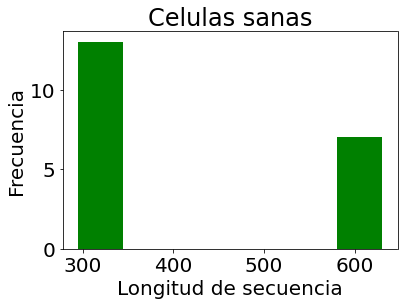

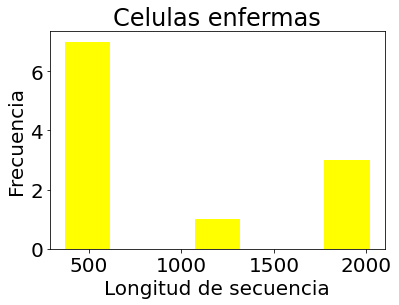

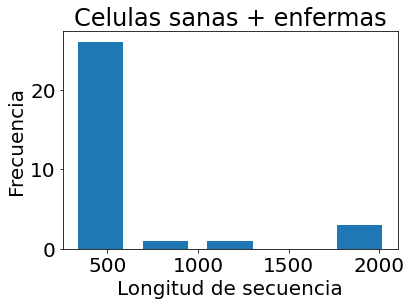

In [15]:
##Respuesta pregunta 3
from matplotlib import pyplot as plt
## celulas sanas 
plt.hist(len_sanas, bins = 5, color = "green", rwidth=0.7)
plt.title("Celulas sanas")
plt.xlabel("Longitud de secuencia")
plt.ylabel("Frecuencia")
plt.show()
## celulas enfermas
plt.hist(len_enfermas, bins = 5, color = "yellow", rwidth=0.7)
plt.title("Celulas enfermas")
plt.xlabel("Longitud de secuencia")
plt.ylabel("Frecuencia")
plt.show()
## celulas totales
plt.hist(len_total, bins = 5, rwidth=0.7)
plt.title("Celulas sanas + enfermas")
plt.xlabel("Longitud de secuencia")
plt.ylabel("Frecuencia")
plt.show()

En los resultados obtenidos se hizo el analisis de las secuencias del gen 5s rRNA de la especie homo sapiens. Los gráficos se divieron en tres para poder realizar una mejor interpretacion. El primer graficos estan las celulas sanas que presentaron un rango de tamaño centralizado en 300 y 600, diferiendo con la segunda imagen, donde se encontraron valores mas distribuidos entre 500 a 2000. Entonces como se puede ver las secuencias en las celulas sanas presentaron un promedio de longitud menor que en el caso de las celulas enfermas, por lo que se puede decir que si secuencia del gen 5s rRNA presenta una secuencia entre 500 a 2000, lo mas probable es que se trata de una secuencia de una celula enferma. De la misma forma si la secuencia tiene menos de 600, es más probable que la secuencia seria de una celula sana.

**4. [2 puntos]** Realizar un árbol filogenético donde se muestre
las secuencias de células normales y las células cancerosas.
Explique los hallazgos. 

In [9]:
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias.aln", "clustal")
print(ClustalAlign)
tree = Phylo.read("secuencias.dnd", "newick")

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=secuencias.fasta
Alignment with 31 rows and 2091 columns
--------------------------------------------...--- OX177011.1
--------------------------------------------...--- OX177009.1
--------------------------------------------...--- OX177008.1
--------------------------------------------...--- OX176994.1
--------------------------------------------...--- OX176992.1
--------------------------------------------...--- OX176991.1
--------------------------------------------...--- OX176976.1
--------------------------------------------...--- OX176974.1
--------------------------------------------...--- OX176973.1
--------------------------------------------...--- OX174968.1
--------------------------------------------...--- OX174966.1
--------------------------------------------...--- OX174965.1
--------------------------------------------...--- X71797.1
--------------------------------------------...--- X71798.1
----------------------

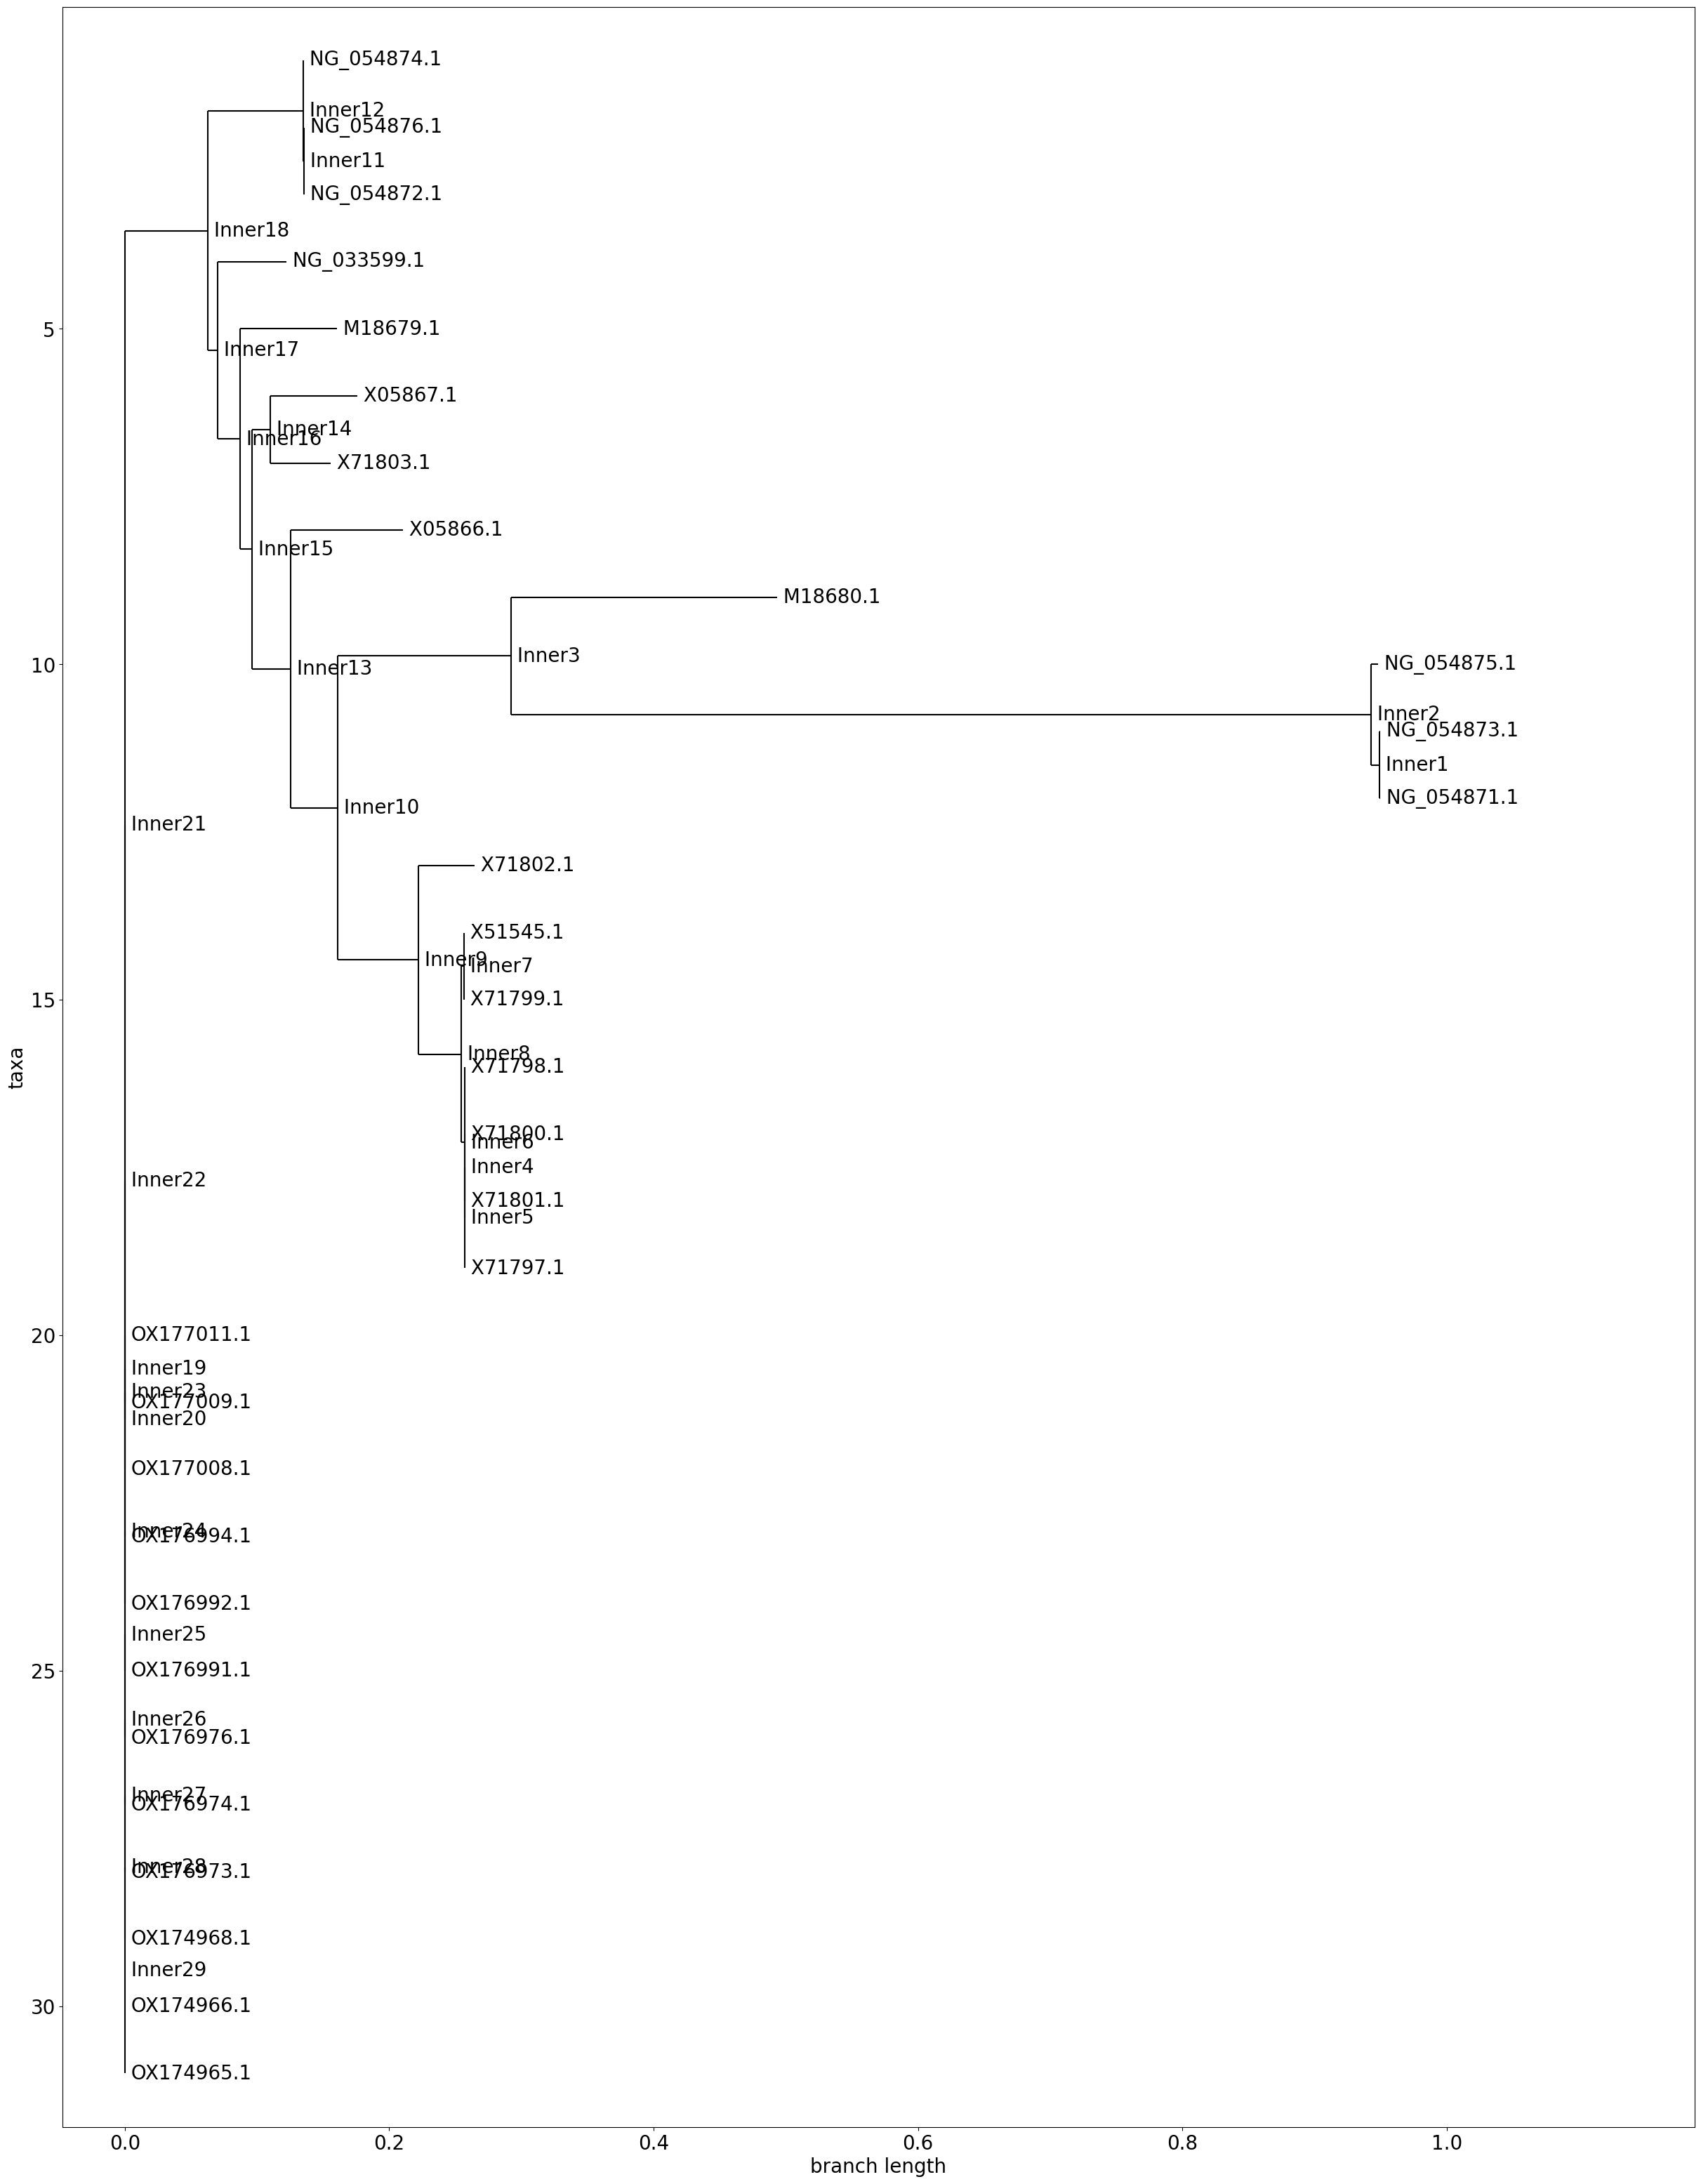

In [10]:
## creamos los modulos de calculos 
with open("secuencias.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
align_total = constructor.build_tree(alignment)
align_total.rooted = True
Phylo.write(align_total, "align_total.xml", "phyloxml")

align_toal = Phylo.read(file="align_total.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#fig = Phylo.draw(cis_tree)

fig = plt.figure(figsize=(30, 40), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=20)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(align_total, axes=axes)
fig.savefig("align_total.jpg")